In [2]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr

In [3]:
# csv file containing air temperature and ground temperatures at varying depths for different sites (measured in july - september 2011)
df = pd.read_csv("raw_datasets/erikson/Groundtemperatu/BTI_2011TimeSeriesData_GroundTemperature.csv")

# csv file containing mean sediment diameters and descriptions of sediment samples at different sites (measured in july 2011)
df_sediment = pd.read_csv("raw_datasets/erikson/Meangrainsizeof/BTI_2011GrainSize_Data.csv")

# Read the Shapefile into a GeoDataFrame
gdf_sl = gpd.read_file('raw_datasets/gibbs/BarterIsland_Shoreline_1947to2020.zip').to_crs(crs="4326")

In [4]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude.values, df.Latitude.values), crs=4326)

gdf_sediment = gpd.GeoDataFrame(df_sediment, geometry=gpd.points_from_xy(df_sediment.Longitude.values, df_sediment.Latitude.values), crs=4326)

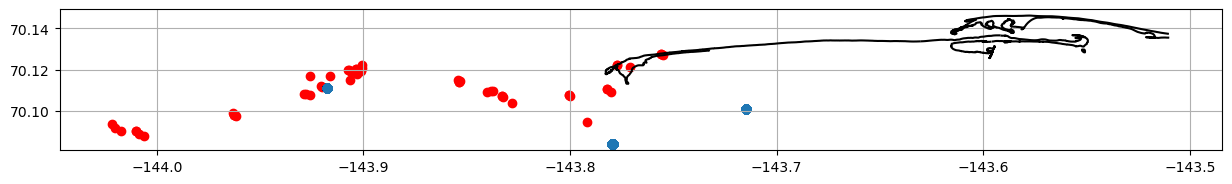

In [5]:
fig, ax = plt.subplots(figsize=(15,5))

gdf_sl[(gdf_sl.Year_ == 2010) + (gdf_sl.Year_ == 2011)].plot(ax=ax, color='k')
gdf_sediment.plot(ax=ax, color='red')
gdf.plot(ax=ax)

ax.grid()

ax.set_aspect('equal')

In [6]:
coords = []

for point in gdf.geometry.values:
    if (point.x, point.y) not in coords:
        coords.append((point.x, point.y))
        
print(coords)

p1 = (-143.77901, 70.08405)  # main land
p2 = (-143.71484, 70.10072)  # main land, but a bit north-eastward
p3 = (-143.91774, 70.11128)  # Arey Island

[(-143.77901, 70.08405), (-143.77921, 70.084111), (-143.77926, 70.08415), (-143.77947, 70.084211), (-143.71484, 70.10072), (-143.91774, 70.11128)]


Assume I only take point 2.

In [7]:
px, py = p3

mask = (gdf.geometry.x == px) * (gdf.geometry.y == py)

gdf_masked = gdf[mask]

gdf_masked.describe()

,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm
count,1.936000e+03,1.936000e+03,1936.0,1936.000000,1936.000000,1936.000000,1936.0,1936.000000,1936.000000,0.0,1936.000000,1936.000000,0.0,0.0,0.0,0.0,0.0
mean,-1.439177e+02,7.011128e+01,2011.0,8.070248,16.657025,11.466942,47.0,6.740393,6.073812,NaN,4.890754,4.506715,NaN,NaN,NaN,NaN,NaN
std,3.070338e-12,1.421453e-12,0.0,0.781718,8.347624,6.917524,0.0,4.055037,3.061803,NaN,2.410670,2.278867,NaN,NaN,NaN,NaN,NaN
min,-1.439177e+02,7.011128e+01,2011.0,7.000000,1.000000,0.000000,47.0,-2.000000,-2.000000,NaN,-2.000000,-2.000000,NaN,NaN,NaN,NaN,NaN
25%,-1.439177e+02,7.011128e+01,2011.0,7.000000,10.000000,5.000000,47.0,3.500000,4.000000,NaN,3.500000,3.500000,NaN,NaN,NaN,NaN,NaN
50%,-1.439177e+02,7.011128e+01,2011.0,8.000000,17.000000,11.000000,47.0,6.500000,6.000000,NaN,4.500000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,-1.439177e+02,7.011128e+01,2011.0,9.000000,24.000000,17.000000,47.0,9.425000,8.000000,NaN,6.500000,6.000000,NaN,NaN,NaN,NaN,NaN
max,-1.439177e+02,7.011128e+01,2011.0,9.000000,31.000000,23.000000,47.0,22.300000,17.000000,NaN,16.000000,16.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
display(gdf_masked.head())
display(gdf_masked.tail())

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,geometry
9839,BILS,EMS ibutton,-143.91774,70.11128,2011,7,10,0,47,10.9,11.0,NaN,4.5,3.0,NaN,NaN,NaN,NaN,NaN,POINT (-143.91774 70.11128)
9840,BILS,EMS ibutton,-143.91774,70.11128,2011,7,10,1,47,9.5,10.5,NaN,4.5,3.0,NaN,NaN,NaN,NaN,NaN,POINT (-143.91774 70.11128)
9841,BILS,EMS ibutton,-143.91774,70.11128,2011,7,10,2,47,8.5,10.0,NaN,4.5,3.0,NaN,NaN,NaN,NaN,NaN,POINT (-143.91774 70.11128)
9842,BILS,EMS ibutton,-143.91774,70.11128,2011,7,10,3,47,8.0,9.5,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,POINT (-143.91774 70.11128)
9843,BILS,EMS ibutton,-143.91774,70.11128,2011,7,10,4,47,7.0,9.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,POINT (-143.91774 70.11128)


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,geometry
11770,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,11,47,-1.0,-0.5,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,POINT (-143.91774 70.11128)
11771,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,12,47,-0.5,-0.5,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN,POINT (-143.91774 70.11128)
11772,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,13,47,-0.5,0.0,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN,POINT (-143.91774 70.11128)
11773,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,14,47,-0.5,1.5,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN,POINT (-143.91774 70.11128)
11774,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,15,47,-0.5,3.0,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN,POINT (-143.91774 70.11128)


* p1 only has values for T50, T100, T200, T295
* p2 only has values for Tair and T15.
* p3 only has values for Tair, T10, T30, T50

Regarding completeness of the data, this might make p1 the most suitable, even though it's on Arey Island, which is a bit out of the way. All data was collected between 8-7-2011 and 26-9-2011.

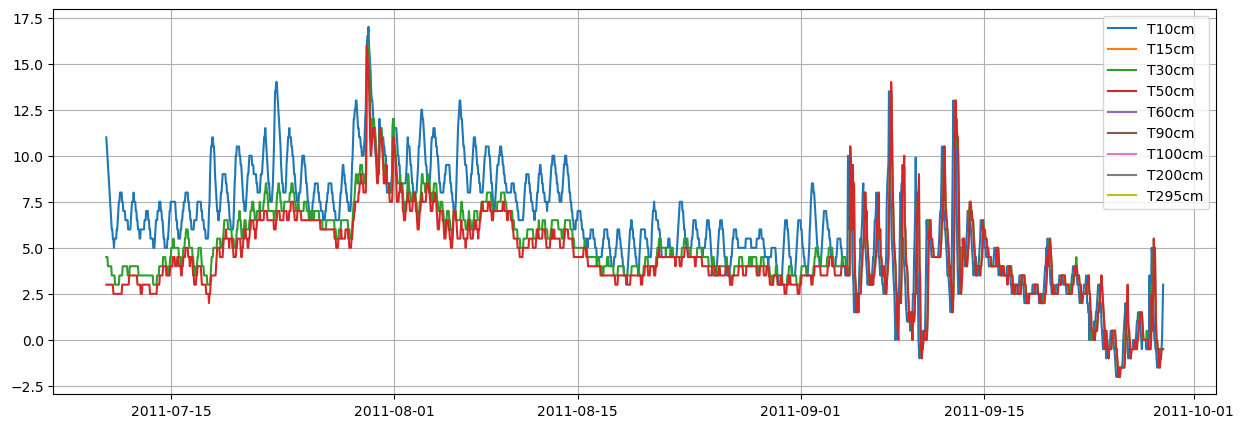

In [9]:
timestamps = pd.to_datetime(gdf_masked[["year", "month", "day", "hour", "minute"]])
T10 = gdf_masked.T10cm.values
T15 = gdf_masked.T15cm.values
T30 = gdf_masked.T30cm.values
T50 = gdf_masked.T50cm.values
T60 = gdf_masked.T60cm.values
T90 = gdf_masked.T90cm.values
T100 = gdf_masked.T100cm.values
T200 = gdf_masked.T200cm.values
T295 = gdf_masked.T295cm.values

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(timestamps, T10, label='T10cm')
ax.plot(timestamps, T15, label='T15cm')
ax.plot(timestamps, T30, label='T30cm')
ax.plot(timestamps, T50, label='T50cm')
ax.plot(timestamps, T60, label='T60cm')
ax.plot(timestamps, T90, label='T90cm')
ax.plot(timestamps, T100, label='T100cm')
ax.plot(timestamps, T200, label='T200cm')
ax.plot(timestamps, T295, label='T295cm')

ax.legend()
ax.grid()


This data should be compared with the Era5 data (which I don't have yet for the correct year).

In [10]:
# load in era5 data
era5 = pd.read_csv(os.path.join(os.getcwd(), Path("ts_datasets/era5.csv")), parse_dates=['time'])

YEAR = 2011

# mask out correct values
timestamps_era5 = pd.to_datetime(era5.time.values)
mask = (timestamps_era5.month >= 7) * (timestamps_era5.month <= 9) * (timestamps_era5.year == YEAR)
era5_masked = era5[mask]


# timestamps used for plotting
t_start = pd.to_datetime("07-01-2011")
t_end = pd.to_datetime("10-01-2011")

timestamps_era5_plot = pd.date_range(start=t_start, end=t_end, freq='1h', inclusive='left')

# get arrays of values
T035_era5 = era5_masked.soil_temperature_level_1.values - 273.15
T18_era5 = era5_masked.soil_temperature_level_2.values - 273.15
T64_era5 = era5_masked.soil_temperature_level_3.values - 273.15
T195_era5 = era5_masked.soil_temperature_level_4.values - 273.15

print(len(era5_masked.soil_temperature_level_1.values))
print(len(timestamps_era5_plot))

2208
2208


Text(0.5, 0.98, 'ground temperature (era5 & Erikson)')

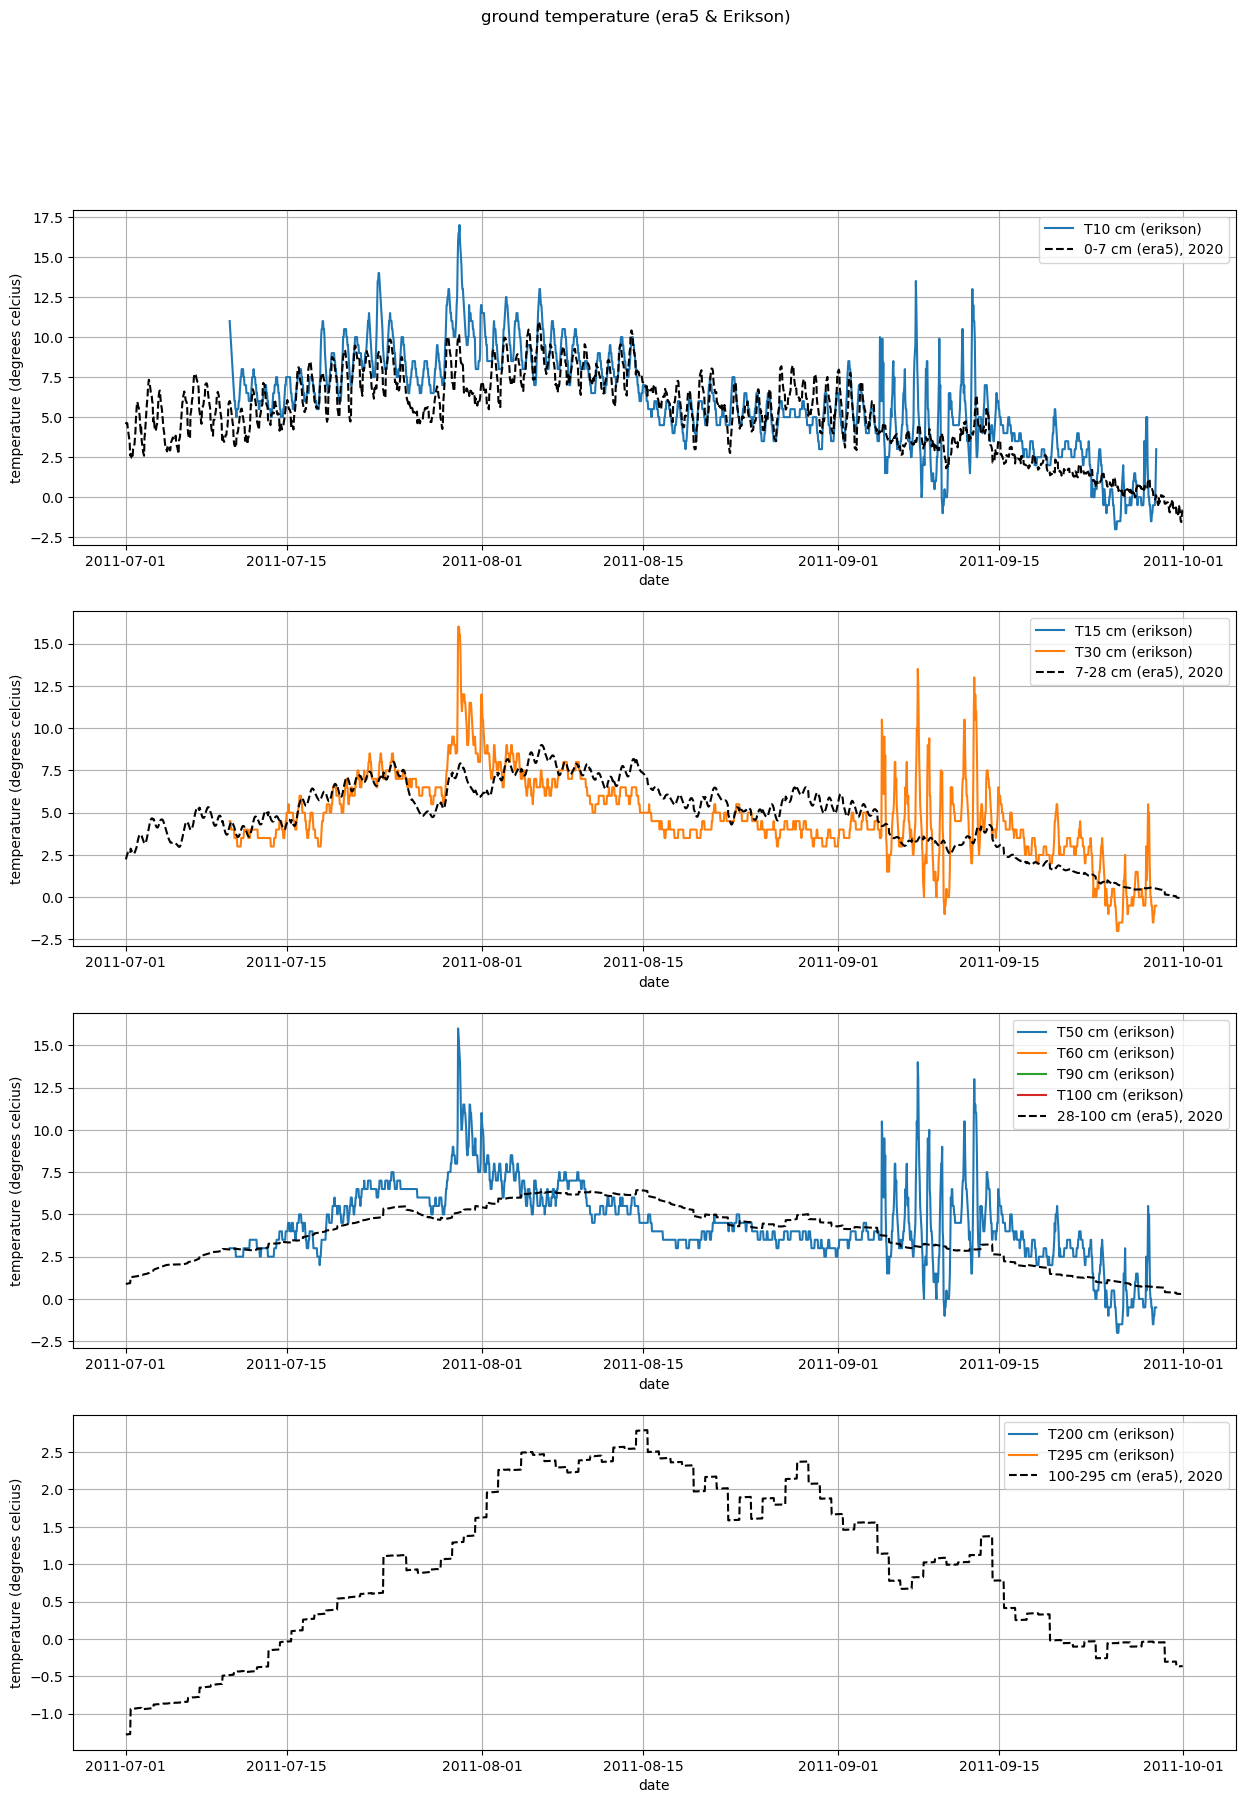

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(15,20))

axs[0].plot(timestamps, T10, label='T10 cm (erikson)')
axs[1].plot(timestamps, T15, label='T15 cm (erikson)')
axs[1].plot(timestamps, T30, label='T30 cm (erikson)')
axs[2].plot(timestamps, T50, label='T50 cm (erikson)')
axs[2].plot(timestamps, T60, label='T60 cm (erikson)')
axs[2].plot(timestamps, T90, label='T90 cm (erikson)')
axs[2].plot(timestamps, T100, label='T100 cm (erikson)')
axs[3].plot(timestamps, T200, label='T200 cm (erikson)')
axs[3].plot(timestamps, T295, label='T295 cm (erikson)')

axs[0].plot(timestamps_era5_plot, T035_era5, label='0-7 cm (era5), 2020', ls='--', color='k')
axs[1].plot(timestamps_era5_plot, T18_era5, label='7-28 cm (era5), 2020', ls='--', color='k')
axs[2].plot(timestamps_era5_plot, T64_era5, label='28-100 cm (era5), 2020', ls='--', color='k')
axs[3].plot(timestamps_era5_plot, T195_era5, label='100-295 cm (era5), 2020', ls='--', color='k')

for ax in axs:
    ax.set_xlabel("date")
    ax.set_ylabel("temperature (degrees celcius)")
    ax.legend()

    ax.grid()
    
fig.suptitle("ground temperature (era5 & Erikson)")

Results for different points:
- p1 is about 6 degrees too low and has not that good data availability
- p2 is about 2.5 degrees to high and has bad data availability
- p3 shows reasonable resemblance and has good data availability.

In general, Erikson's ground temperature data is much peakier.